# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [100]:
print("Чтобы при перезапуске кода, в котором используется рандомизация, например деление выборки на две части или инициализация весов при запуске \nмодели, получать одинаковый результат(одинаковое разделение выборки, одинаковые стартовые веса признаков).")

Чтобы при перезапуске кода, в котором используется рандомизация, например деление выборки на две части или инициализация весов при запуске 
модели, получать одинаковый результат(одинаковое разделение выборки, одинаковые стартовые веса признаков).


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [101]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [102]:
np.random.seed(42)
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [103]:
display(df_test.head())
display(df_test.tail())

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [104]:
display(df_train.describe(include='all'))
display(df_test.describe(include='all'))

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [105]:
display(df_train.isna().mean())
display(df_test.isna().mean())

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.028861
engine           0.028861
max_power        0.028004
torque           0.029004
seats            0.028861
dtype: float64

name             0.000
year             0.000
selling_price    0.000
km_driven        0.000
fuel             0.000
seller_type      0.000
transmission     0.000
owner            0.000
mileage          0.019
engine           0.019
max_power        0.019
torque           0.019
seats            0.019
dtype: float64

Как мы видим как в df_train, так и в df_test есть NaN в последних 5 колонках: 'mileage', 'engine', 'max_power', 'torque', 'seats'.

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

Целевой переменной (target) в нашей работе является цена. Соответственно при просмотре повторов исключим колонку selling_price.

In [106]:
# df_train.info(verbose=True, show_counts=True)

In [107]:
without_c2 = ['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', \
              'owner','mileage', 'engine', 'max_power', 'torque', 'seats']

In [108]:
display(len(df_train[df_train.duplicated(subset=without_c2, keep='first')==True]))
display(len(df_train[df_train.duplicated(subset=without_c2, keep=False)==True]))

1159

1799

Количество дубликатов = 1159. Также мы можем сделать дополнительный вывод, что в нашем датасете есть строки которые дублируются больше 2-х раз, так как при использовании параметра keep=False мы получили цифру 1799, которая была бы равна 2318(1159x2), если бы у нас каждая строка дублировалась ровно один раз. А так как она меньше 2318, то значит некоторые строки дублируются по два или более раз.

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [109]:
display(df_train[df_train.duplicated(subset=without_c2, keep='first')==True])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
326,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
338,Skoda Rapid 1.6 MPI AT Elegance,2016,645000,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,103.5 bhp,153Nm@ 3800rpm,5.0
357,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
358,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
359,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [110]:
df_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [111]:
df_train.drop_duplicates(subset=without_c2, keep='first', inplace=True)   # Удаляем строки-дубликаты
df_train.info(verbose=True, show_counts=True)                             # И проверяем что все удалилось

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5840 entries, 0 to 6996
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5654 non-null   object 
 9   engine         5654 non-null   object 
 10  max_power      5657 non-null   object 
 11  torque         5653 non-null   object 
 12  seats          5654 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 638.8+ KB


In [112]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [113]:
df_train.tail(8)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6988,Maruti Alto K10 VXI Airbag,2017,340000,45000,Petrol,Individual,Manual,First Owner,23.95 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6990,Hyundai i20 Magna,2013,380000,25000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6991,Maruti Wagon R LXI Optional,2017,360000,80000,Petrol,Individual,Manual,First Owner,20.51 kmpl,998 CC,67.04 bhp,90Nm@ 3500rpm,5.0
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0


In [114]:
df_train = df_train.reset_index(drop=True)

In [115]:
df_train.tail(8)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
5832,Maruti Alto K10 VXI Airbag,2017,340000,45000,Petrol,Individual,Manual,First Owner,23.95 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5833,Hyundai i20 Magna,2013,380000,25000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5834,Maruti Wagon R LXI Optional,2017,360000,80000,Petrol,Individual,Manual,First Owner,20.51 kmpl,998 CC,67.04 bhp,90Nm@ 3500rpm,5.0
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
5839,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [116]:
df_train.head(8)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
5,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
6,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
7,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0


In [117]:
torque_list = list(df_train['torque'])
torque_list_t = list(df_test['torque'])
# print(torque_list_t)                  # print'ы закомментированы чтобы сохранить читаемость ноутбука

Беглый просмотр показал, что в качестве разделителя можно использовать "@", но не для всех есть например и такие значения '22.4 kgm at 1750-2750rpm'. Но также еще есть 20.4@ 1400-3400(kgm@ rpm). Rpm они везде rpm, а вот для первого признака есть как Nm, так и kgm. Еще бывают вот такие штуки - "51Nm@ 4000+/-500rpm", '48@ 3,000+/-500(NM@ rpm)' (вот эту штуку заменим сразу, так как она только была только по одному экземпляру в каждом датасете, у других элементов с такой структурой единица - kgm), и такие - "210 / 1900", а еще и такие "380Nm(38.7kgm)@ 2500rpm". В общем будем много где импровизировать..

1 kilogram meter (kgm) = 9.80665 newton meter (nm)

In [118]:
torque_new_list = []
rpm_new_list = []
for i in range(len(torque_list)):
    temp = str(torque_list[i]).replace('48@ 3,000+/-500(NM@ rpm)', '48Nm@ 3,000rpm')
    temp = temp.replace('+/', '')
    temp = temp.replace('/', '@')
    temp = temp.replace('at', '@')
    try:
        torque_new_list.append(temp.split('@')[0].strip())
    except:
        torque_new_list.append(np.nan)
    try:
        rpm_new_list.append(temp.split('@')[1].strip())
    except:
        rpm_new_list.append(np.nan)
        
torque_new_list_t = []
rpm_new_list_t = []
for i in range(len(torque_list_t)):
    temp = str(torque_list_t[i]).replace('48@ 3,000+/-500(NM@ rpm)', '48Nm@ 3,000rpm')
    temp = temp.replace('+/', '')
    temp = temp.replace('/', '@')
    temp = temp.replace('at', '@')
    try:
        torque_new_list_t.append(temp.split('@')[0].strip())
    except:
        torque_new_list_t.append(np.nan)
    try:
        rpm_new_list_t.append(temp.split('@')[1].strip())
    except:
        rpm_new_list_t.append(np.nan)

In [119]:
torque_new_list2 = []
for value in torque_new_list:
    temp2 = str(value.split('(')[0]).lower()
    try:
        if not 'nm' in temp2:
            temp2 = temp2.replace('kgm', '')
            temp2 = temp2.replace(',', '.')
            temp2 = temp2.strip()
            torque_new_list2.append(float(temp2)*9.8)
        elif 'nm' in temp2:
            temp2 = str(value.split('(')[0]).lower()
            temp2 = temp2.replace('nm', '')
            temp2 = temp2.replace(',', '.')
            temp2 = temp2.strip()
            torque_new_list2.append(float(temp2))
    except:
        torque_new_list2.append(np.nan)
print(len(torque_new_list2))
# print(torque_new_list2)

torque_new_list2_t = []
for value in torque_new_list_t:
    temp2 = str(value.split('(')[0]).lower()
    try:
        if not 'nm' in temp2:
            temp2 = temp2.replace('kgm', '')
            temp2 = temp2.replace(',', '.')
            temp2 = temp2.strip()
            torque_new_list2_t.append(float(temp2)*9.8)
        elif 'nm' in temp2:
            temp2 = str(value.split('(')[0]).lower()
            temp2 = temp2.replace('nm', '')
            temp2 = temp2.replace(',', '.')
            temp2 = temp2.strip()
            torque_new_list2_t.append(float(temp2))
    except:
        torque_new_list2_t.append(np.nan)
# print(len(torque_new_list2_t))
# print(torque_new_list2_t)

5840


Когда мы делили на 2 части вот этот элемент - '380Nm(38.7kgm)@ 2500rpm' не очень удачно поделился, у нас остался '38.7kgm)', а последняя часть улетела в никуда. К счастью такое значение было одно, поэтому просто заменим его на "2500".

In [120]:
rpm_new_list2 = []
for value in rpm_new_list:
    temp3 = str(value).lower()
    try:
        temp3 = temp3.replace('(kgm', '')
        temp3 = temp3.replace('38.7kgm)', '2500')
        temp3 = temp3.replace('rpm', '')
        temp3 = temp3.replace('~', '')
        temp3 = temp3.replace(',', '')
        temp3list = temp3.strip().split('-')
        if len(temp3list)==1:
            rpm_new_list2.append(int(temp3list[0]))
        elif len(temp3list)==2:
            if temp3list[0] > temp3list[1]:
                rpm_new_list2.append(int(temp3list[0]))
            elif temp3list[0] < temp3list[1]:
                rpm_new_list2.append(int(temp3list[1]))
    except:
        rpm_new_list2.append(np.nan)
print(len(rpm_new_list2))
# print(rpm_new_list2)

rpm_new_list2_t = []
for value in rpm_new_list_t:
    temp3 = str(value).lower()
    try:
        temp3 = temp3.replace('(kgm', '')
        temp3 = temp3.replace('38.7kgm)', '2500')
        temp3 = temp3.replace('rpm', '')
        temp3 = temp3.replace('~', '')
        temp3 = temp3.replace(',', '')
        temp3list = temp3.strip().split('-')
        if len(temp3list)==1:
            rpm_new_list2_t.append(int(temp3list[0]))
        elif len(temp3list)==2:
            if temp3list[0] > temp3list[1]:
                rpm_new_list2_t.append(int(temp3list[0]))
            elif temp3list[0] < temp3list[1]:
                rpm_new_list2_t.append(int(temp3list[1]))
    except:
        rpm_new_list2_t.append(np.nan)
print(len(rpm_new_list2_t))
# print(rpm_new_list2_t)

5840
1000


In [121]:
df_train['torque'] = torque_new_list2
df_train['max_torque_rpm'] = rpm_new_list2

df_test['torque'] = torque_new_list2_t
df_test['max_torque_rpm'] = rpm_new_list2_t

Теперь займемся признаками mileage, engine, max_power. Уберем единицы измерения и сконвертируем во float.

In [122]:
df_train['mileage'] = df_train['mileage'].str.split(' ', n=1, expand=True)[0].astype('float')
df_test['mileage'] = df_test['mileage'].str.split(' ', n=1, expand=True)[0].astype('float')

df_train['engine'] = df_train['engine'].str.split(' ', n=1, expand=True)[0].astype('float')
df_test['engine'] = df_test['engine'].str.split(' ', n=1, expand=True)[0].astype('float')

df_train["max_power"] = df_train["max_power"].str.extract('(\d+.\d+)').astype('float')
df_test["max_power"] = df_test["max_power"].str.extract('(\d+.\d+)').astype('float')

In [123]:
# df_train.info()
# df_test.info()
display(df_train.head(2))
display(df_test.head(2))

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,NaN,190.0,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0,2500.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,260.0,7.0,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,260.0,5.0,2750.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [124]:
# df_train.describe()

In [125]:
df_train = df_train.fillna(value=df_train.describe().loc['50%', 'mileage':'max_torque_rpm'])
df_test = df_test.fillna(value=df_train.describe().loc['50%', 'mileage':'max_torque_rpm'])

In [126]:
df_train['torque'] = df_train['torque'].astype('float')
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].astype('float')
df_test['torque'] = df_test['torque'].astype('float')
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].astype('float')


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [127]:
print("Потому что это дискретная величина (а не непрерывная) которая может принимать строго определенные целочисленные значения в \nузком диапазоне: например 2,4,5,7. Но например маловероятно, что оно будет равным 200. Причем многие из таких значений хорошо \nхарактеризуют определенные типы(категории) машин, например для купе - 2 места, седан - 4 или 5 мест. И при этом маловероятно, что цена будет повышаться при увеличении количества сидений")

Потому что это дискретная величина (а не непрерывная) которая может принимать строго определенные целочисленные значения в 
узком диапазоне: например 2,4,5,7. Но например маловероятно, что оно будет равным 200. Причем многие из таких значений хорошо 
характеризуют определенные типы(категории) машин, например для купе - 2 места, седан - 4 или 5 мест. И при этом маловероятно, что цена будет повышаться при увеличении количества сидений


In [128]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [129]:
df_train.info()
df_test.info()
display(df_train.head(2))
display(df_test.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int32  
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   int32  
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(4), int32(2), int64(3), object(5)
memory usage: 593.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 col

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,88.50,190.0,5,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5,2500.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498,112.0,260.0,7,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497,108.5,260.0,5,2750.0


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

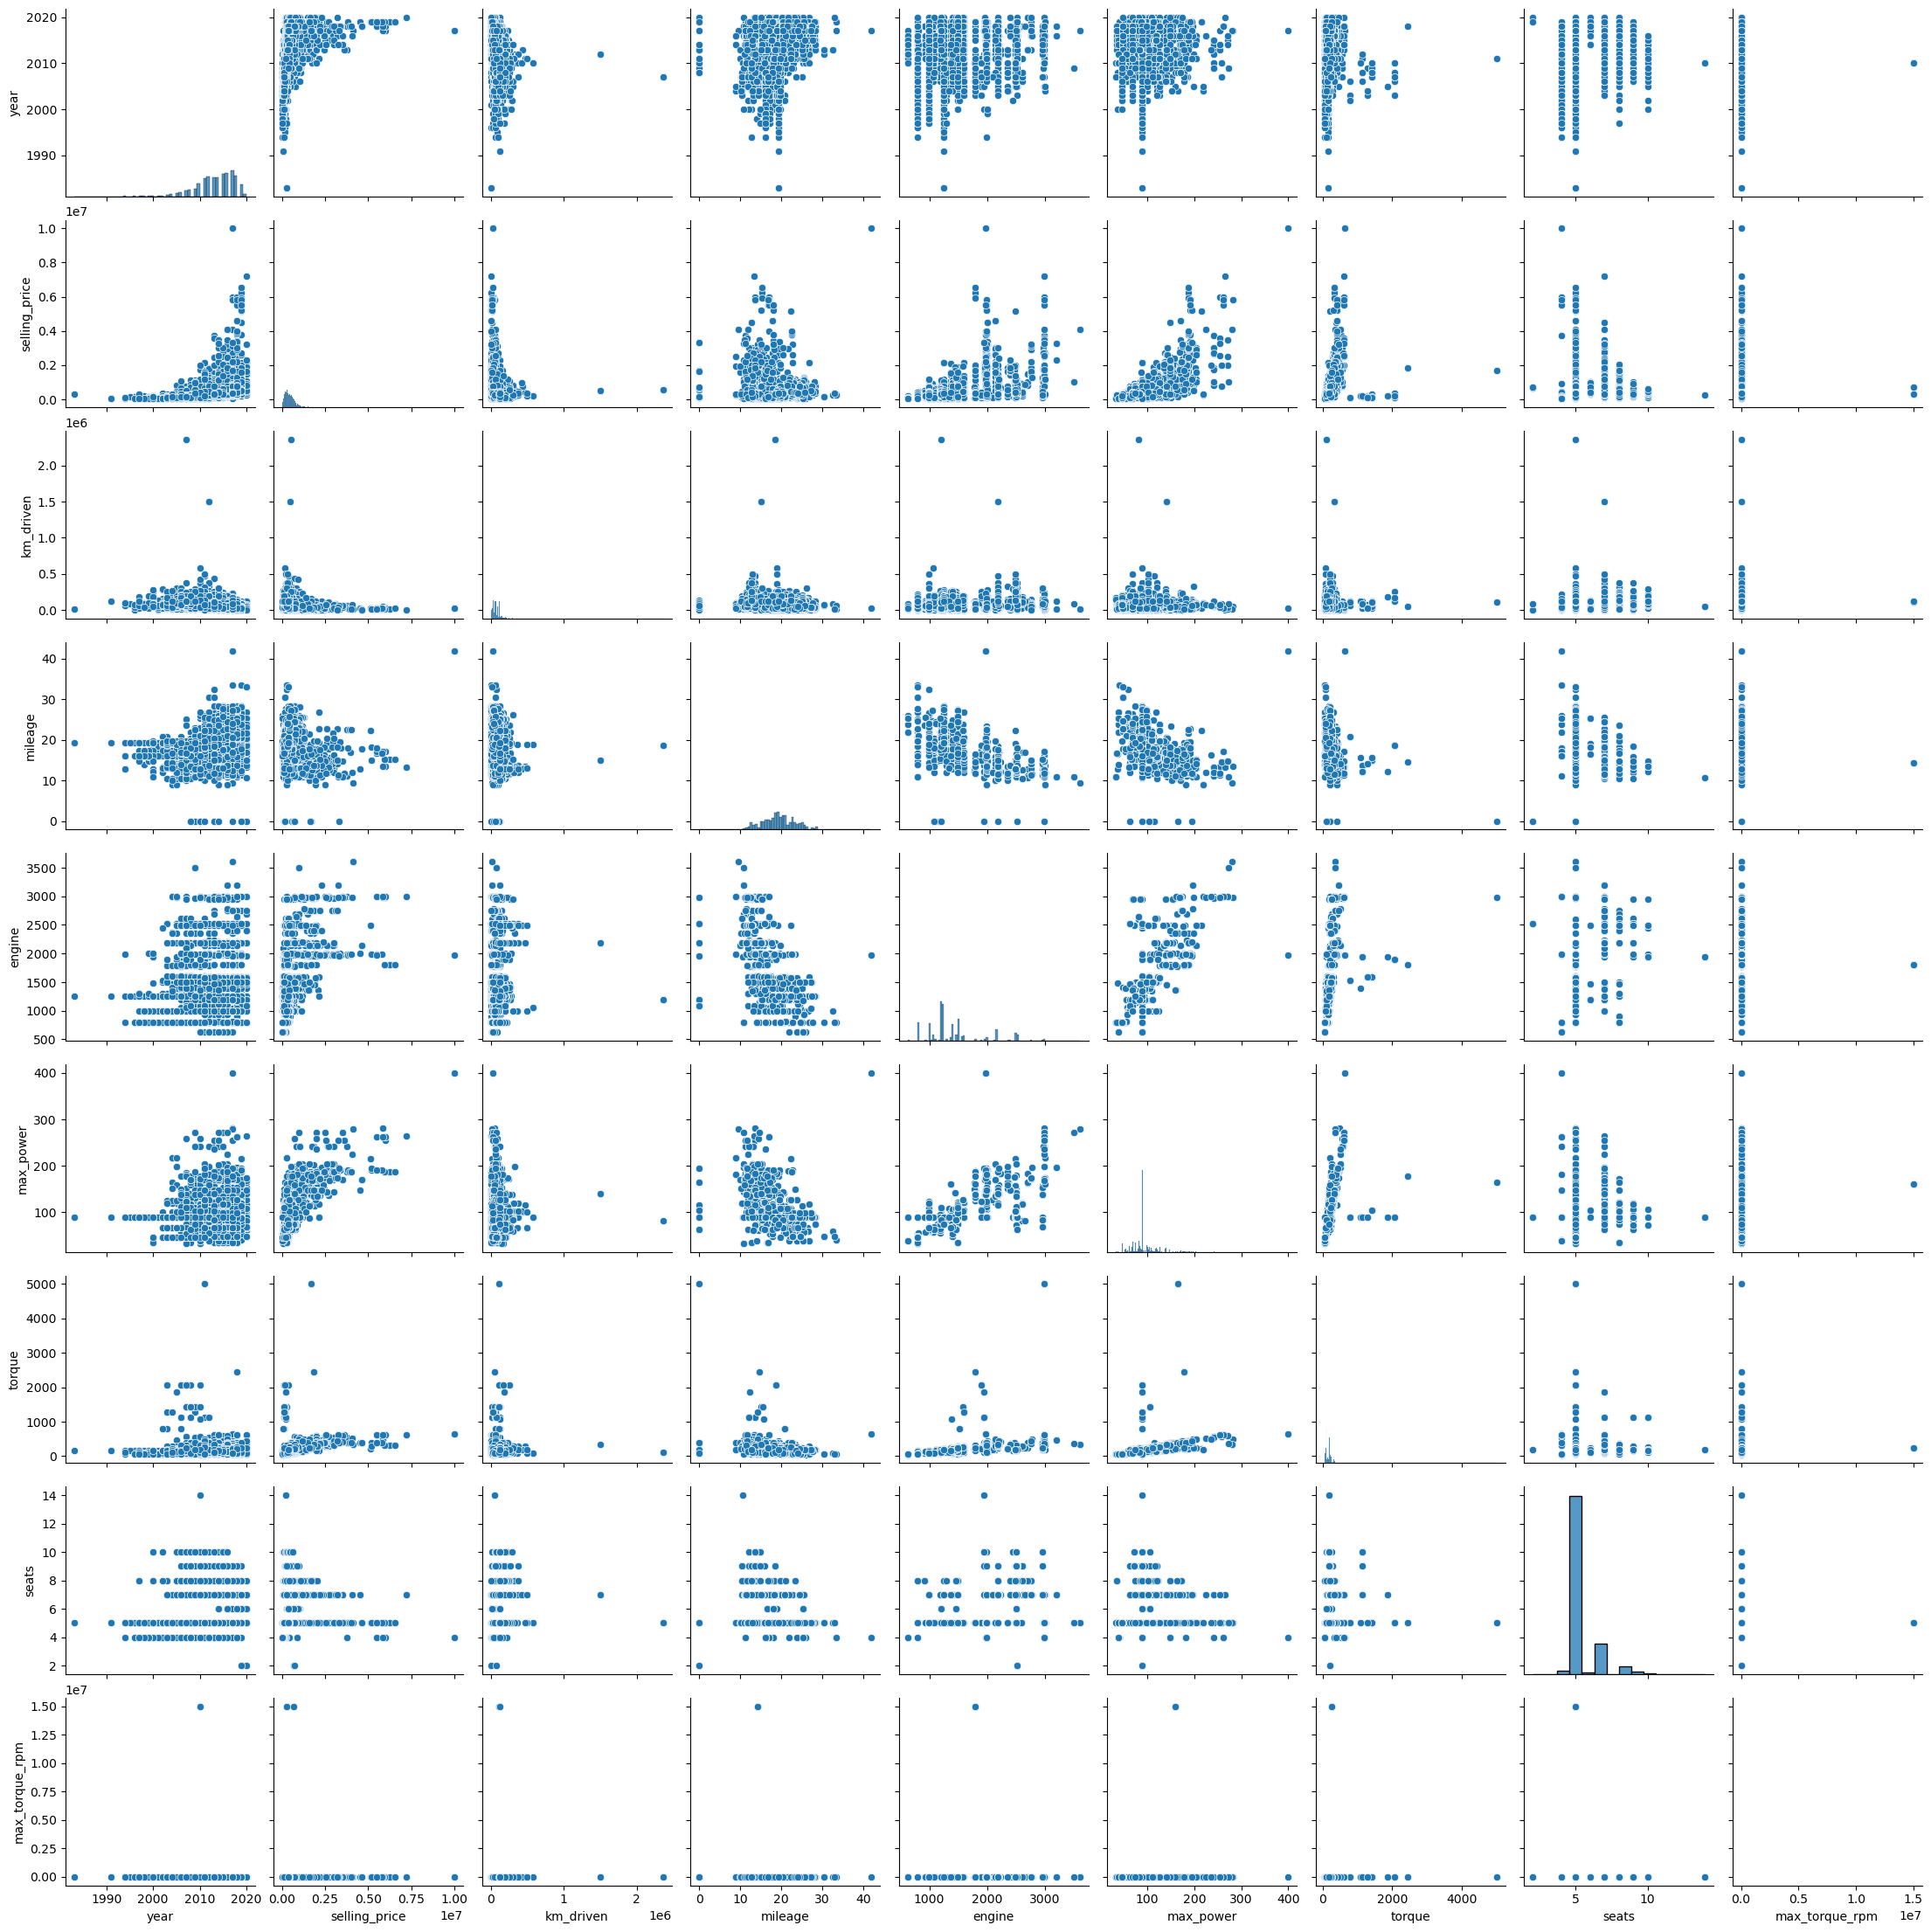

In [130]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?

Видна зависимость selling_price с torque, max_power, engine и year.
    
* А о корреляциях признаков? </font>

Есть корреляция между engine и torque, engine и mileage, torque и max_power, engine и max_power.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

Распределения как на train так и на test очень похожи.

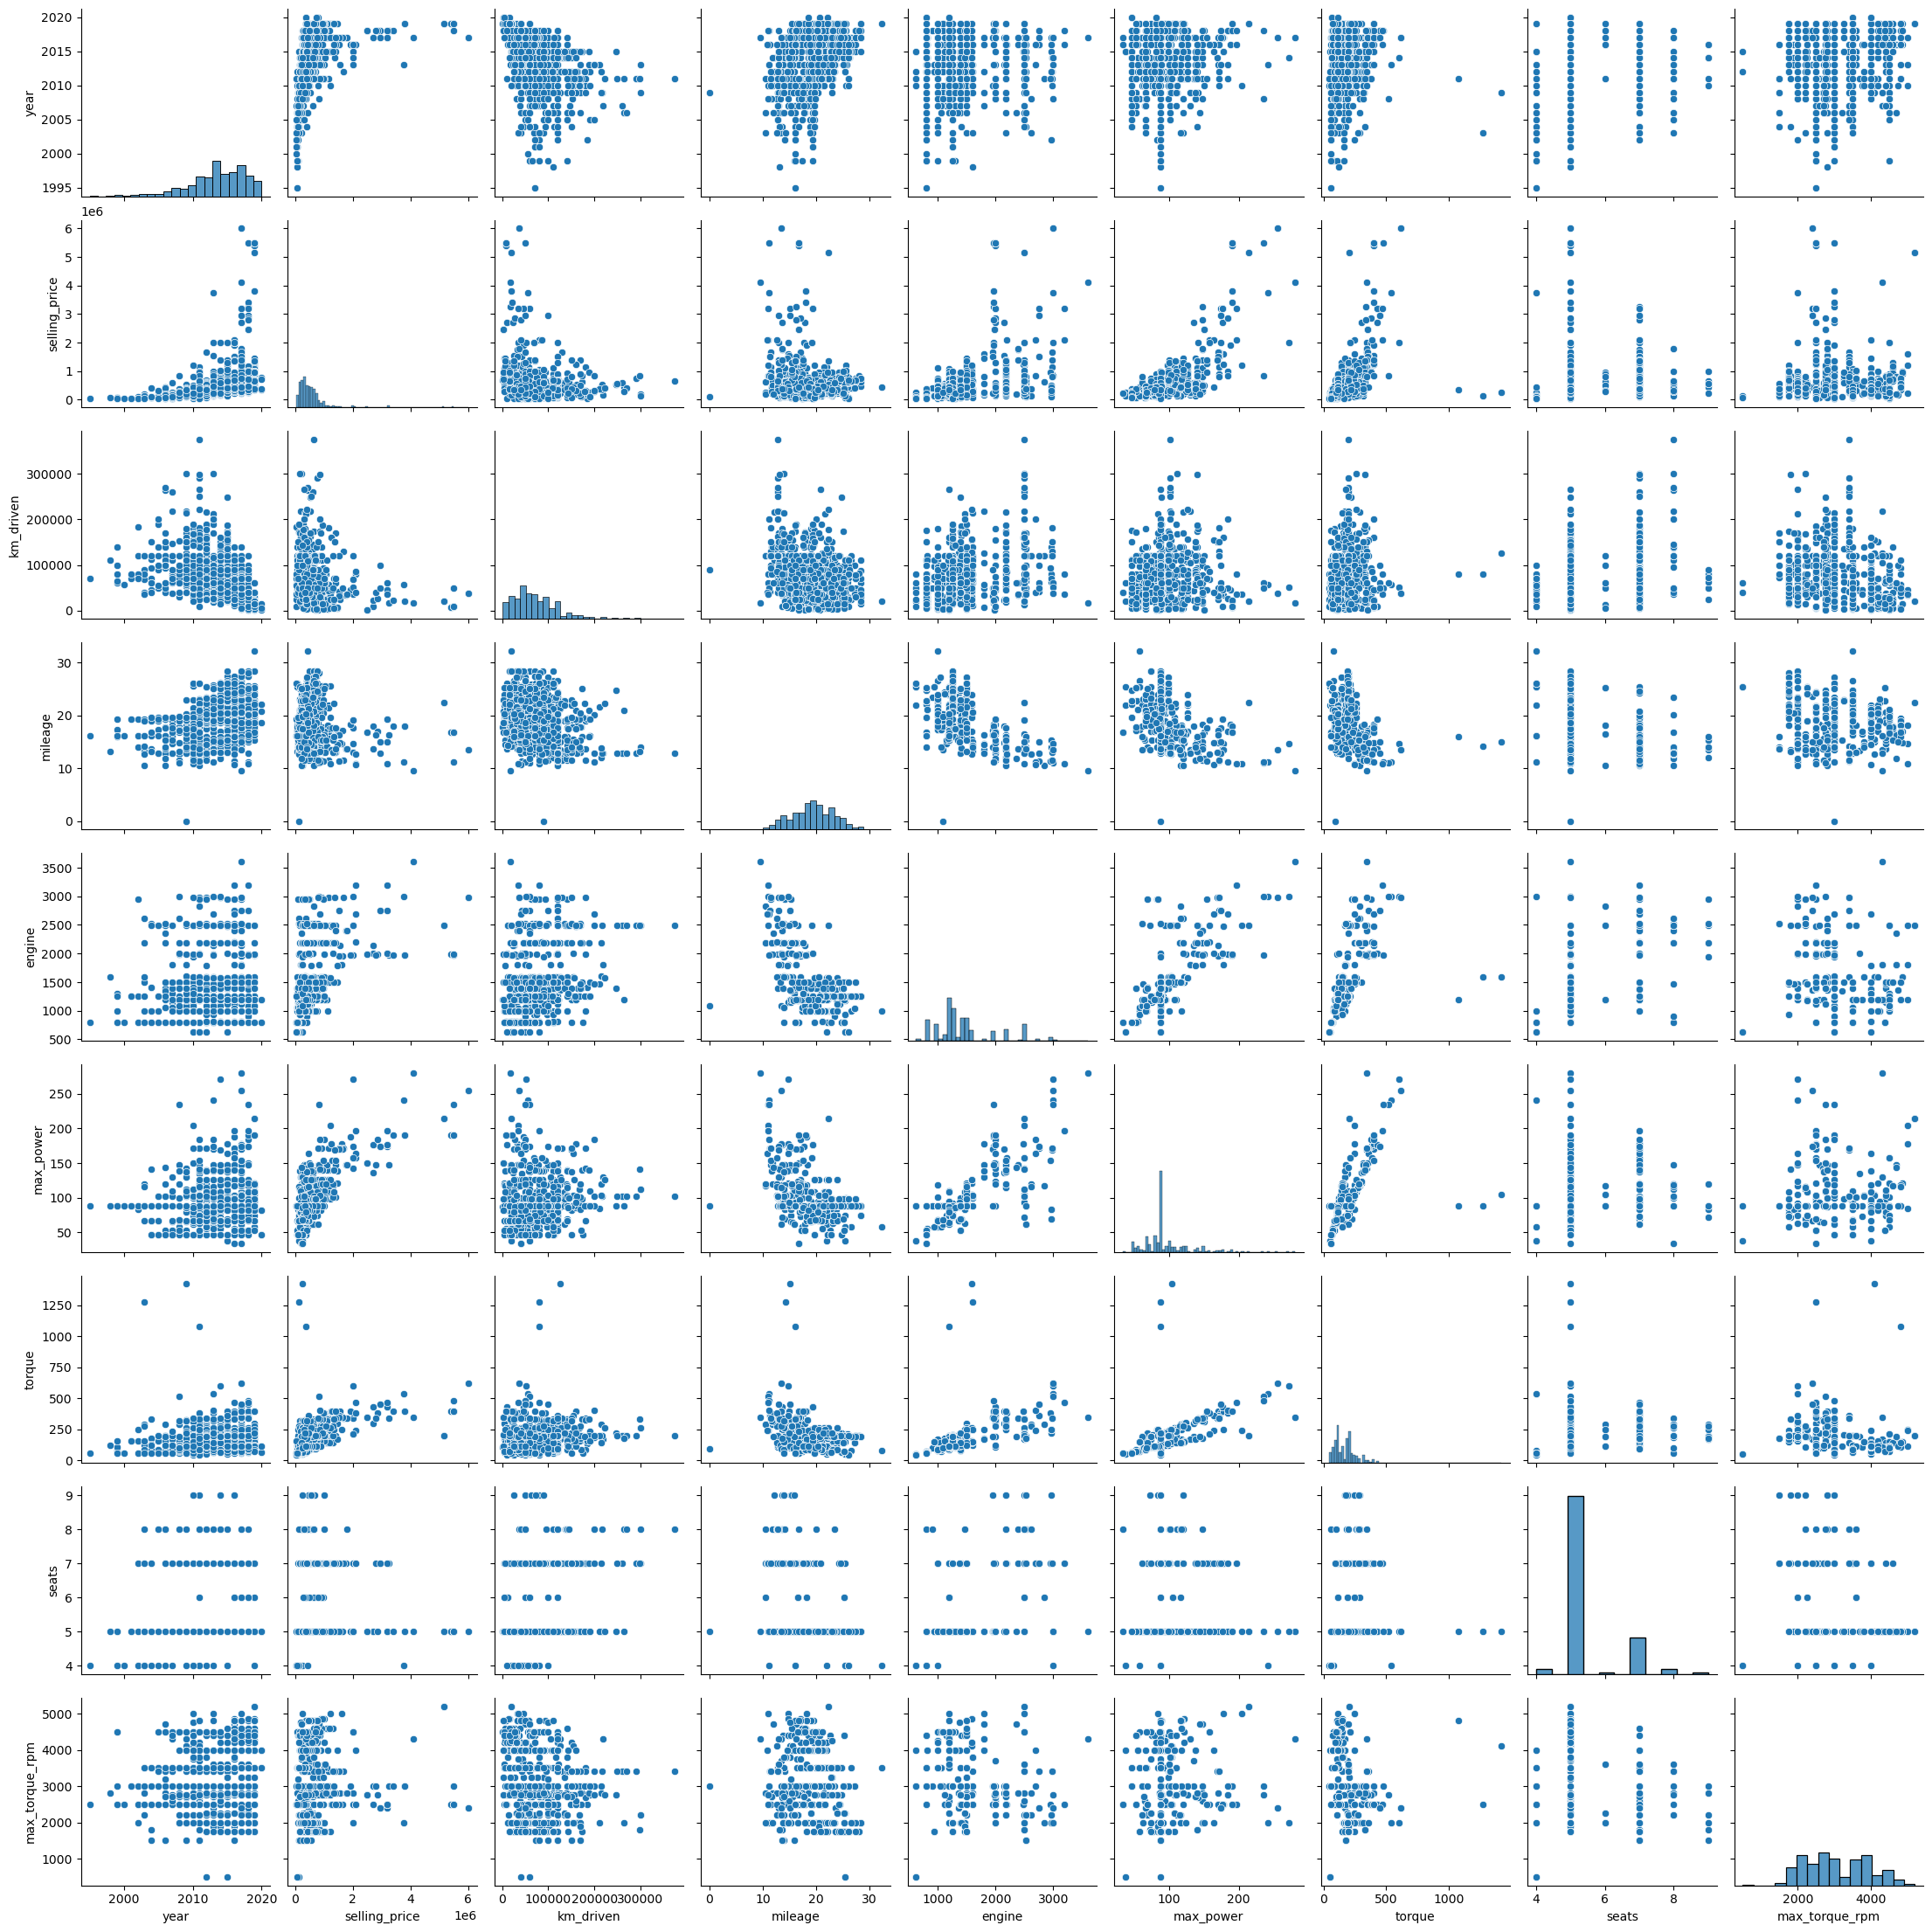

In [131]:
sns.pairplot(df_test)

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<AxesSubplot:>

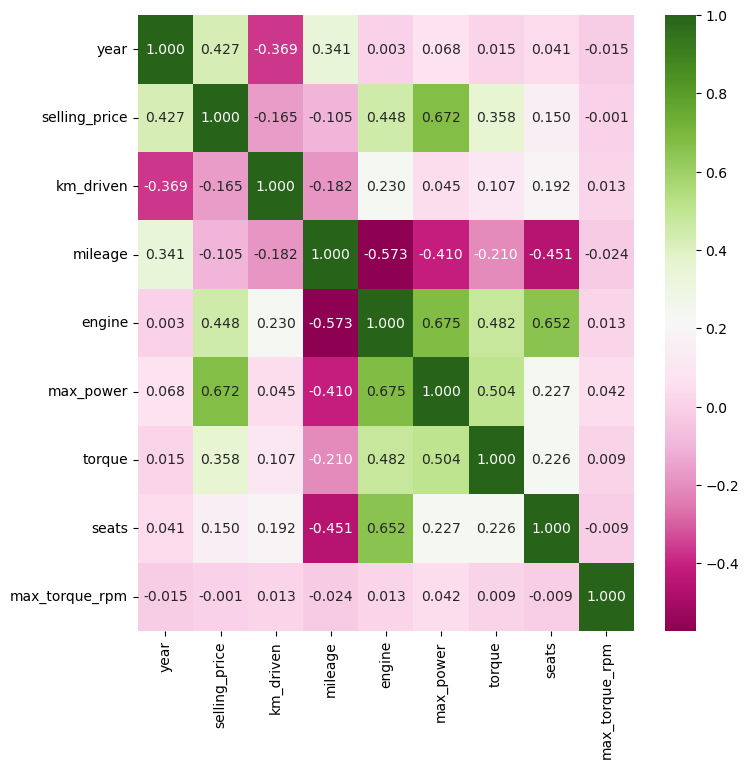

In [132]:
plt.figure(figsize = (8,8))
sns.heatmap(df_train.corr(), annot=True, fmt=".3f", cmap="PiYG")

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

1) engine и year.<br>
2) max_power и engine, max_power и selling_price, seats и engine<br>
3) Связь довольно слабая (-0.37), далеко не всегда будет прослеживаться такая зависимость, поэтому, наверное будет не совсем правильно так утверждать.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<AxesSubplot:xlabel='max_power', ylabel='engine'>

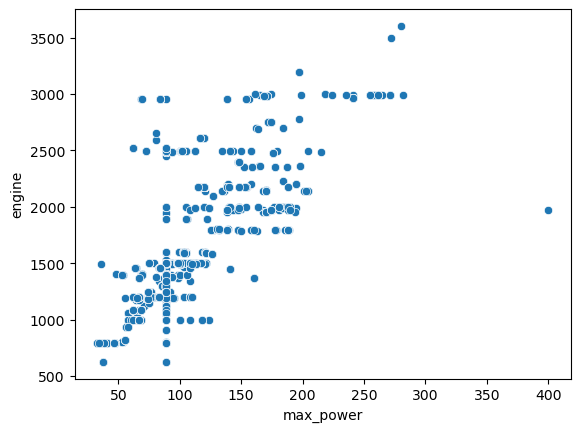

In [135]:
# диаграмма рассеяния для наиболее коррелирующих признаков
sns.scatterplot(data=df_train, x = "max_power", y = "engine")

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

<AxesSubplot:xlabel='max_power', ylabel='selling_price'>

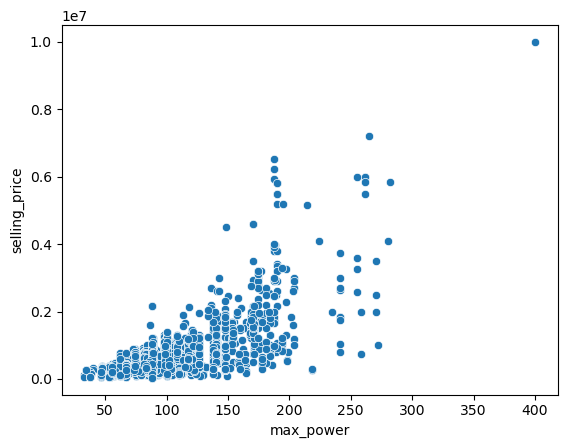

In [136]:
sns.scatterplot(data=df_train, x = "max_power", y = "selling_price")

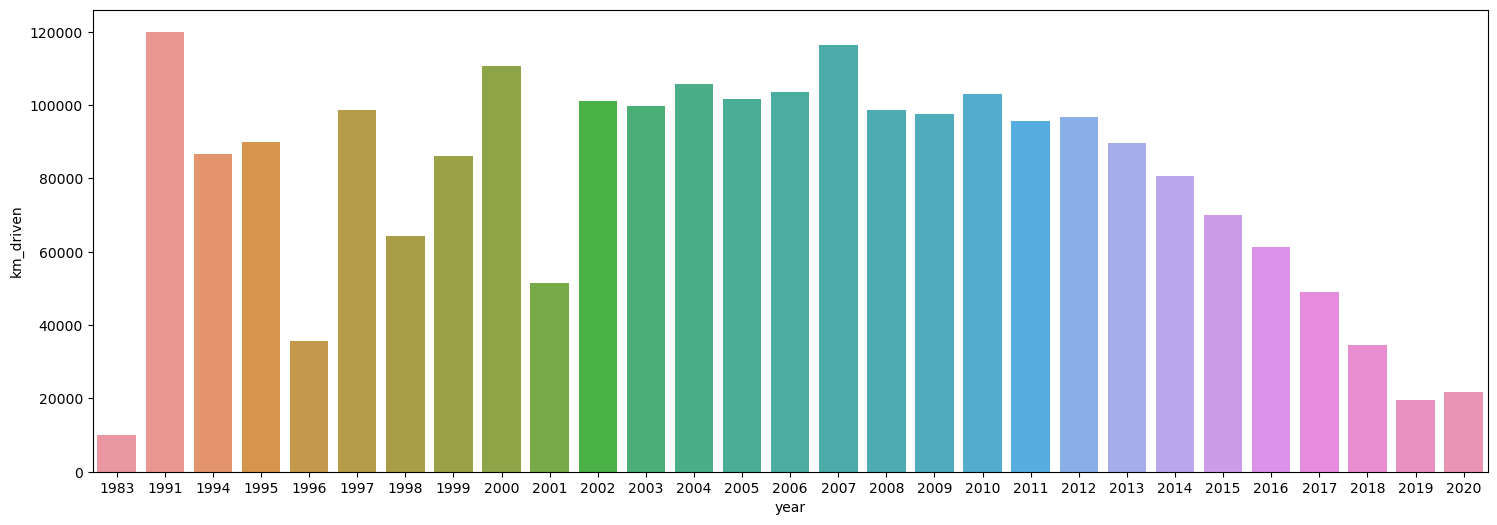

In [161]:
plt.figure(figsize=(18,6))
sns.barplot(data=df_train, x='year', y='km_driven', errorbar=None)
plt.show()

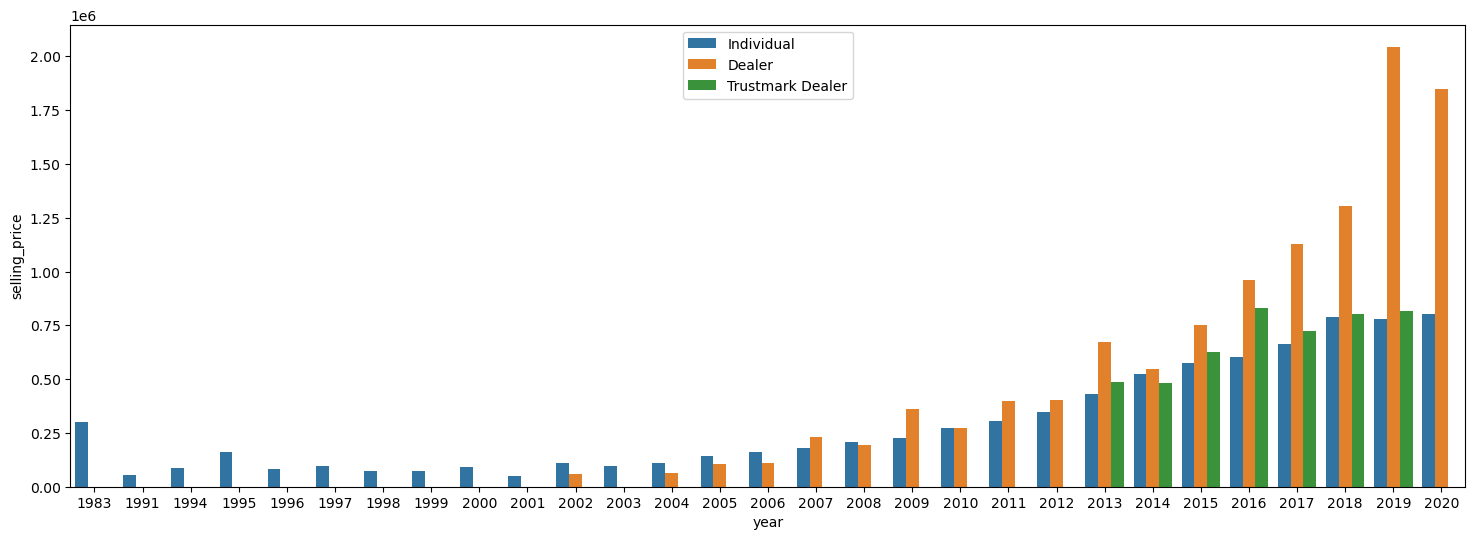

In [157]:
plt.figure(figsize=(18,6))
sns.barplot(data=df_train, x='year', y='selling_price', hue="seller_type", errorbar=None)
plt.legend(loc='upper center')
plt.show()

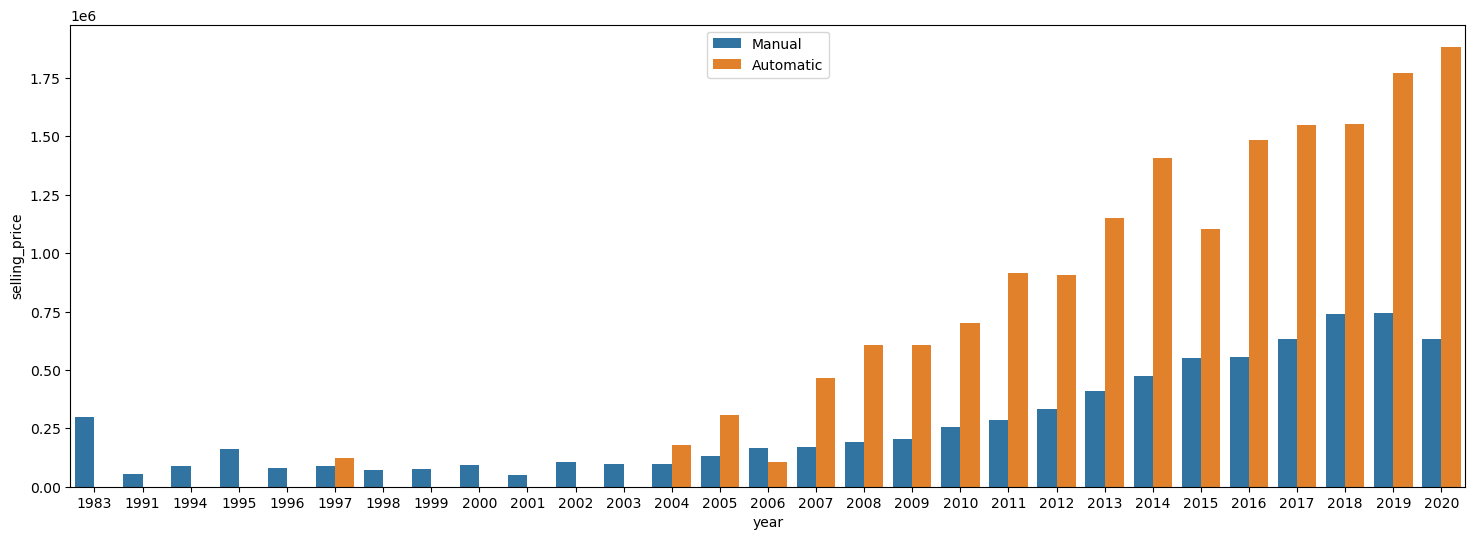

In [158]:
plt.figure(figsize=(18,6))
sns.barplot(data=df_train, x='year', y='selling_price', hue="transmission", errorbar=None)
plt.legend(loc='upper center')
plt.show()

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [162]:
y_train = df_train['selling_price']
X_train = df_train.select_dtypes(['int', 'float']).drop('selling_price', axis=1)

In [164]:
assert X_train.shape == (5840, 6+2)

In [165]:
y_test = df_test['selling_price']
X_test = df_test.select_dtypes(['int', 'float']).drop('selling_price', axis=1)

In [166]:
assert X_test.shape == (1000, 6+2)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)
print('for TRAIN:')
print('MSE:', MSE(y_train, pred_train))
print('R2:', r2_score(y_train, pred_train))
print('for TEST:')
print('MSE:', MSE(y_test, pred_test))
print('R2:', r2_score(y_test, pred_test))

for TRAIN:
MSE: 112990612638.74571
R2: 0.6058077461443081
for TEST:
MSE: 224063049849.73618
R2: 0.6102089089835208


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [184]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)
pred_train = lr_scaled.predict(X_train_scaled)
pred_test = lr_scaled.predict(X_test_scaled)

print('for TRAIN:')
print('MSE:', MSE(y_train, pred_train))
print('R2:', r2_score(y_train, pred_train))
print('for TEST:')
print('MSE:', MSE(y_test, pred_test))
print('R2:', r2_score(y_test, pred_test))

for TRAIN:
MSE: 112990612638.74585
R2: 0.6058077461443077
for TEST:
MSE: 224063049849.73297
R2: 0.6102089089835263


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [175]:
lr_scaled.coef_

array([180411.42132775, -40504.23753497,  33336.66155286,  51353.57872981,
       323972.06698497,  16045.5918826 , -15235.6201158 , -11093.28924659])

In [180]:
print('Hаиболее информативным оказался', X_train.iloc[:,list(lr_scaled.coef_).index(max(lr_scaled.coef_))].name)

Hаиболее информативным оказался max_power


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [185]:
from sklearn.linear_model import Lasso

lr_lasso = Lasso()
lr_lasso.fit(X_train_scaled, y_train)
pred_train = lr_lasso.predict(X_train_scaled)
pred_test = lr_lasso.predict(X_test_scaled)

print('for TRAIN:')
print('MSE:', MSE(y_train, pred_train))
print('R2:', r2_score(y_train, pred_train))
print('for TEST:')
print('MSE:', MSE(y_test, pred_test))
print('R2:', r2_score(y_test, pred_test))

for TRAIN:
MSE: 112990612649.8313
R2: 0.6058077461056337
for TEST:
MSE: 224063745215.83038
R2: 0.6102076992904959


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

L1-регуляризация с параметрами по умолчанию не занулила веса, возможно потому что признаков у нас не так уж и много и все они используются в предсказании. При необходимости, подбором параметра регуляризации можно добиться зануления..

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [187]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': range(10, 5000, 50)}
lr_lasso = Lasso()

grid_search = GridSearchCV(estimator=lr_lasso, param_grid=parameters, cv=10)
grid_search.fit(X_train_scaled, y_train)
lasso_best = grid_search.best_estimator_
lasso_best.fit(X_train_scaled, y_train)

print('for TRAIN:')
print('MSE:', MSE(y_train, lasso_best.predict(X_train_scaled)))
print('R2:', r2_score(y_train, lasso_best.predict(X_train_scaled)))
print('for TEST:')
print('MSE:', MSE(y_test, lasso_best.predict(X_test_scaled)))
print('R2:', r2_score(y_test, lasso_best.predict(X_test_scaled)))

for TRAIN:
MSE: 113258147701.27005
R2: 0.6048743920645399
for TEST:
MSE: 227745169224.3459
R2: 0.6038033131958862


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [188]:
print(len(parameters['alpha'])*10)

1000


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [191]:
print(lasso_best.alpha)
lasso_best.fit(X_train_scaled, y_train)
lasso_best.coef_

4960


array([179841.29156511, -35024.88289781,  24463.6798564 ,  29395.89395942,
       327511.86734009,  14271.96724101,  -1349.27239346,  -6150.10424431])

Наилучшим оказалось значение параметра равное 4960. Никакие веса при этом параметре не занулились.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [193]:
from sklearn.linear_model import ElasticNet

parameters = {'alpha': np.arange(0.1,1.1,0.1), 'l1_ratio': np.arange(0.1,1.1,0.1)}
lr_elastic = ElasticNet(random_state=41)
grid_search = GridSearchCV(lr_elastic, parameters, cv=10)
grid_search.fit(X_train_scaled, y_train)
grid_search.best_estimator_

ElasticNet(alpha=0.6, l1_ratio=0.8, random_state=41)

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

Наилучшими параметрами в данном случае оказались alpha=0.6 и l1_ratio=0.8

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [194]:
X_train_cat = df_train.drop(['name', 'selling_price'], axis=1)
X_test_cat = df_test.drop(['name', 'selling_price'], axis=1)

In [198]:
assert X_train_cat.shape == (5840, 10+2)

In [199]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [201]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
from sklearn.compose import make_column_transformer

transformer = make_column_transformer((OneHotEncoder(), \
                                       ['fuel', 'seller_type', 'transmission', 'owner', 'seats']), \
                                      remainder='passthrough')

X_train_data = pd.DataFrame(transformer.fit_transform(X_train_cat), columns=transformer.get_feature_names_out())
X_test_data = pd.DataFrame(transformer.fit_transform(X_test_cat), columns=transformer.get_feature_names_out())

In [214]:
display(len(X_train_data.columns) - len(X_test_data.columns))
column_diff = list(set(list(X_train_data.columns)) - set(list(X_test_data.columns)))
print(column_diff)

X_test_data['onehotencoder__seats_10'] = np.zeros(X_test_data.shape[0])
X_test_data['onehotencoder__seats_2'] = np.zeros(X_test_data.shape[0])
X_test_data['onehotencoder__seats_14'] = np.zeros(X_test_data.shape[0])

X_test_data = X_test_data[list(X_train_data.keys())]

3

['onehotencoder__seats_10', 'onehotencoder__seats_2', 'onehotencoder__seats_14']


In [215]:
display(X_train_data.head(1))
display(X_test_data.head(1))

,onehotencoder__fuel_CNG,onehotencoder__fuel_Diesel,onehotencoder__fuel_LPG,onehotencoder__fuel_Petrol,onehotencoder__seller_type_Dealer,onehotencoder__seller_type_Individual,onehotencoder__seller_type_Trustmark Dealer,onehotencoder__transmission_Automatic,onehotencoder__transmission_Manual,onehotencoder__owner_First Owner,onehotencoder__owner_Fourth & Above Owner,onehotencoder__owner_Second Owner,onehotencoder__owner_Test Drive Car,onehotencoder__owner_Third Owner,onehotencoder__seats_2,onehotencoder__seats_4,onehotencoder__seats_5,onehotencoder__seats_6,onehotencoder__seats_7,onehotencoder__seats_8,onehotencoder__seats_9,onehotencoder__seats_10,onehotencoder__seats_14,remainder__year,remainder__km_driven,remainder__mileage,remainder__engine,remainder__max_power,remainder__torque,remainder__max_torque_rpm
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,145500.0,23.4,1248.0,88.5,190.0,2000.0


,onehotencoder__fuel_CNG,onehotencoder__fuel_Diesel,onehotencoder__fuel_LPG,onehotencoder__fuel_Petrol,onehotencoder__seller_type_Dealer,onehotencoder__seller_type_Individual,onehotencoder__seller_type_Trustmark Dealer,onehotencoder__transmission_Automatic,onehotencoder__transmission_Manual,onehotencoder__owner_First Owner,onehotencoder__owner_Fourth & Above Owner,onehotencoder__owner_Second Owner,onehotencoder__owner_Test Drive Car,onehotencoder__owner_Third Owner,onehotencoder__seats_2,onehotencoder__seats_4,onehotencoder__seats_5,onehotencoder__seats_6,onehotencoder__seats_7,onehotencoder__seats_8,onehotencoder__seats_9,onehotencoder__seats_10,onehotencoder__seats_14,remainder__year,remainder__km_driven,remainder__mileage,remainder__engine,remainder__max_power,remainder__torque,remainder__max_torque_rpm
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2010.0,168000.0,14.0,2498.0,112.0,260.0,2200.0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [225]:
final_model = grid_search.best_estimator_

In [226]:
r2_score(y_test, final_model.predict(X_test_data))

0.6481299641745335

In [223]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': range(1, 50, 1)}
grid_search = GridSearchCV(Ridge(), parameters, cv=10, scoring='r2')
grid_search.fit(X_train_data, y_train)
grid_search.best_estimator_, grid_search.best_score_

(Ridge(alpha=8), 0.6162485496643684)

Да, удалось заметно улучшить качество предсказаний.

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [229]:
def business_metrics(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    
    val = 0
    for i in range(len(y_true)):
        if abs(100 * y_pred[i] / float(y_true[i]) - 100) <= 10:
            val += 1
            
    return float(val) / len(y_true)

business_metrics(y_test, final_model.predict(X_test_data))

0.234

In [230]:
import joblib

joblib.dump(final_model, 'final_model.pkl')
joblib.dump(scaler, open('scaler.pkl','wb'))
joblib.dump(transformer, open('transformer.pkl','wb'))

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link